/var/folders/pd/8dg9ly3x1hx8fn3v2nbcjhx40000gn/T/ipykernel_13458/3247638841.py:71: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate('L = c = 1nm', xy=(3.5, 2),


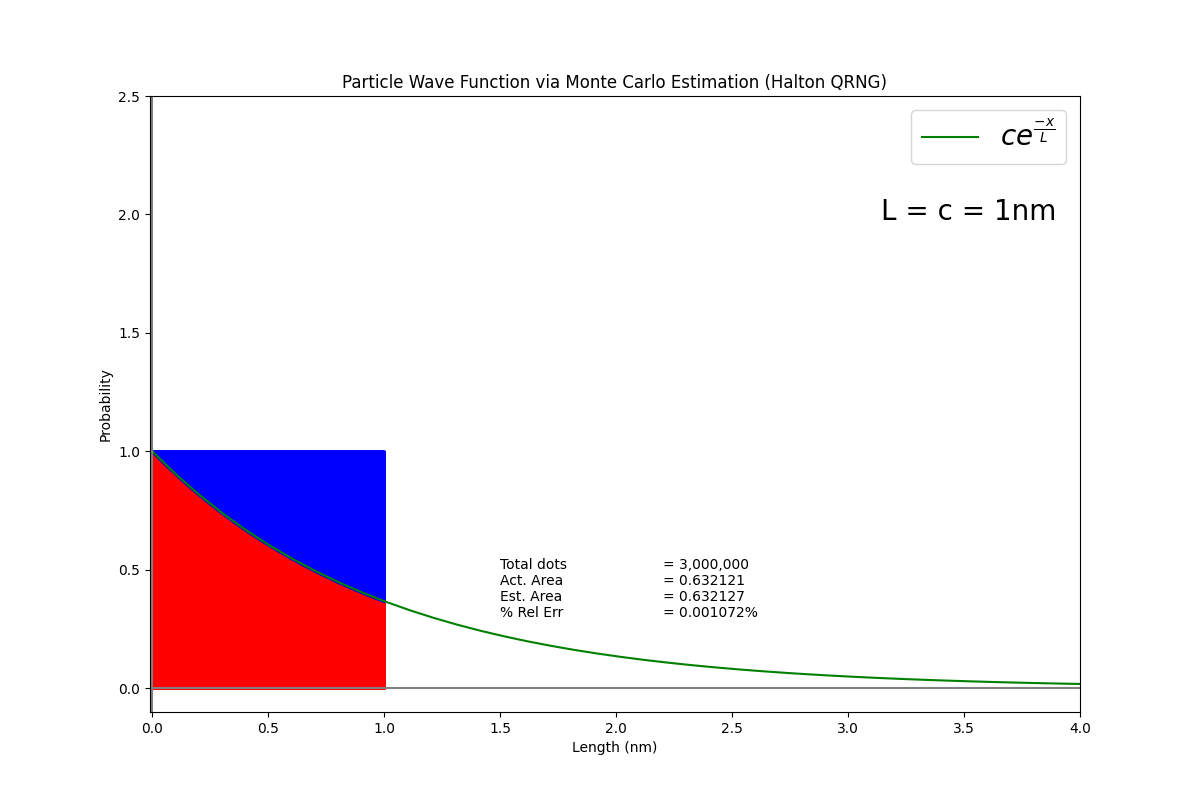

In [1]:
"""particle_location.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from numba import float64, vectorize  # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    """Particle Wave Function with c = 1nm and L = 1nm"""
    return np.exp(-x)


@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    """QRNG"""
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_std_normal(ax: Axes) -> None:
    """Calculates the area from 0 -> 1 nm of a Particle Wave Function"""
    iterations: int = 3_000_000

    primes: list[int] = [2, 3]

    # Gets the random numbers from QRNG
    x: NDArray[np.float_] = halton(
        np.arange(iterations), primes[0])  # type: ignore
    y: NDArray[np.float_] = halton(
        np.arange(iterations), primes[1])  # type: ignore

    d: NDArray[np.float_] = f(x) - y
    # d is the real function value of x

    # Determines which point are above and below the graph
    x_in: NDArray[np.float_] = x[d >= 0.0]
    y_in: NDArray[np.float_] = y[d >= 0.0]

    x_out: NDArray[np.float_] = x[d < 0.0]
    y_out: NDArray[np.float_] = y[d < 0.0]

    # Plots the data points color sorted above and below the function
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue",
               marker=MarkerStyle("."), s=pixel_size)

    # Plots the actual function and notes the values of L and c
    act_x: NDArray[np.float_] = np.linspace(0, 10, 100)
    act_y: NDArray[np.float_] = f(act_x)
    ax.plot(
        act_x, act_y, color="green", label=r"$ce^{\frac {-x} {L}}$"
    )
    ax.annotate('L = c = 1nm', xy=(3.5, 2),
                textcoords='offset points', ha='center', va='center', size=20)

    # Estimates the error of the monte carlo method
    est_area: float = np.count_nonzero(d >= 0.0) / iterations
    act_area = 0.6321205588285576784
    err: float = (est_area - act_area) / act_area

    # Sets the titles and details of the displayed graph
    ax.set_title(
        "Particle Wave Function via Monte Carlo Estimation (Halton QRNG)")
    ax.set_xlabel("Length (nm)")
    ax.set_ylabel("Probability")
    ax.set_xlim(-.01, 4.0)
    ax.set_ylim(-0.1, 2.5)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.legend(loc="upper right", fontsize="20")

    ax.text(1.5, 0.3, "Total dots\nAct. Area\nEst. Area\n% Rel Err", ha="left")

    # fmt: off
    ax.text(2.2, 0.3,
        f"= {iterations:,}\n= {act_area:.6f}\n= {est_area:.6f}\n= {err:.6%}", ha="left")
    # fmt: on


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(12, 8))
    plot_std_normal(plt.axes())
    plt.show()


main()


In [2]:
# Cell 2

import scipy.integrate as integrate


def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    """Particle Wave Function with c = 1nm and L = 1nm"""
    return np.exp(-x)


result = integrate.quad(f, 0, 1)
print(
    f"The numerically estimated probability of 0nm < x < 1nm = {result[0]:.6f} nm")


The numerically estimated probability of 0nm < x < 1nm = 0.632121 nm
